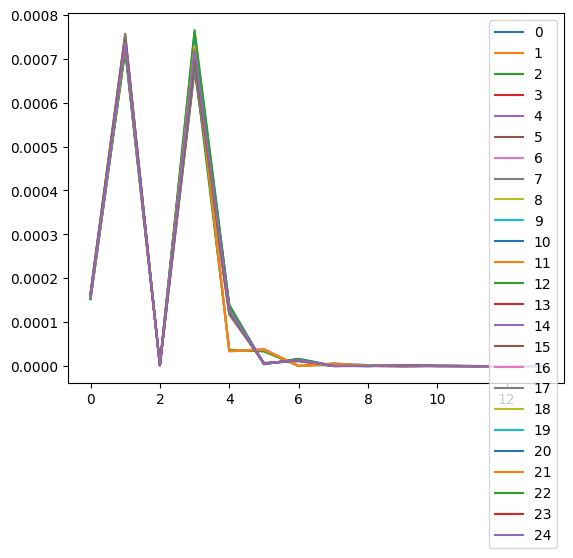

ValueError: cannot reshape array of size 40 into shape (40,2)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
from vqls import *
from utils import *
import matplotlib.lines as mlines


nq = 1
n_step = 20 
step = (1-(-1))/n_step

label = 'tanh'
func_out = {'sigmoid': sigmoid,'tanh': tanh,'elu': elu, 'relu': relu, 'sin':sin_m}
func_list = list(func_out.keys())
func_dict = {'sigmoid': .0,'tanh': 1.0,'elu':.12, 'relu':.0, 'sin':1}
columns=['function', 'nq', 'knot', 'training cost', 'time(s)', 'weights', 'RSS_h', 'RSS_q' ]

file_path = f'results/results_vqs_{label}_1_{n_step}.json'

lower = -1. 
upper = 1. 
f_i = func_dict[label]
scaled=False
func = func_out[label]


df = pd.read_json(file_path)

#Visualize training cost and obtain best performing epoch
argM = []
for i,item in enumerate(df["training_cost"].values):
    argM.append(np.argmin(item))
    plt.plot(item, label = i)
plt.legend()
plt.show()
best = np.argmin(df['rmse'])
weights = df['weights'][best]


X = []
weights = df['weights'][best]
x = np.arange(-1, 1 + .03, step).tolist()
from utils import *
y = [func(value,f_i) for value in x]

for i in range(1, len(x)):
    X.append(np.arange(x[i - 1], x[i], step - 0.0001).tolist())



#################################
######### Inner Product #########
#################################

qc_full = []
classic_prod = []
qprod = qProduct(1)
for i in range(len(X)):
    for x in X[i]:
        point = [1,x]
        qc_full.append(qprod.direct_prod2(weights[i],point,visualize=False))  

x = [item for sublist in X for item in sublist]
y = [func(value,f_i) for value in x]




x1=[i for j,i in enumerate(x) if j%2==0]
y1=[i for j,i in enumerate(y) if j%2==0]
x2 = np.array([i for i in x]).reshape([40,2])
yeee = np.array([i.item() for i in qc_full]).reshape([40,2])


fig, ax = plt.subplots(figsize=(10, 8))
#ax.plot(x, qc_full, color='steelblue',label=' Qspline') 
#ax.scatter(x, qc_full, color='steelblue',label=' Qspline') 
for xk, yk in zip(x2, yeee):
    ax.plot(xk, yk, color='#33cc33') 
    ax.scatter(xk, yk, color='#008000') 

ax.plot(x1,y1,color='#ffb84d', zorder = -1, label='classical')
ax.scatter(x1,y1,color='sienna',s=10)
ax.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()
plt.close()


In [9]:
df.head()

,exe_time,rmse,RSS_q,weights,training_cost,seed
0,135.334465,0.215254,1.853364,"[[5.856539168], [5.931680815], [-0.3172302222]...","[0.00016069130000000002, 0.0007425685, 2.15990...",8102
1,128.446153,0.215140,1.851406,"[[5.8573385559], [5.9314926378], [-0.316876669...","[0.0001604874, 0.0007419824, 2.1898e-06, 0.000...",1455
2,135.980538,0.214076,1.833136,"[[5.8887591016], [5.9108798384], [-0.291969075...","[0.0001632994, 0.0007500724, 1.7978e-06, 0.000...",6921
3,131.130464,0.214464,1.839800,"[[5.8887683889], [5.9149592131], [-0.316659810...","[0.00016554810000000002, 0.0007565505, 1.51530...",7234
4,145.018117,0.215411,1.856074,"[[5.8848346208], [5.9139603143], [-0.287442213...","[0.0001614238, 0.0007446750000000001, 2.0544e-...",3863


In [10]:
columns=['function', 'training cost', 'time(s)', 'weights', 'RSS_q', 'rmse']
tot = []
for flab, fun in func_out.items():
    file_path = f'results/results_vqs_{flab}_1_{n_step}.json'
    df = pd.read_json(file_path)
    best = np.argmin(df['RSS_q'])
    weights = df['weights'][best]
    tot.append([flab, df.training_cost[best], df.exe_time[best], df['weights'][best], df.RSS_q[best], df.rmse ])

df = pd.DataFrame(tot, columns=columns)


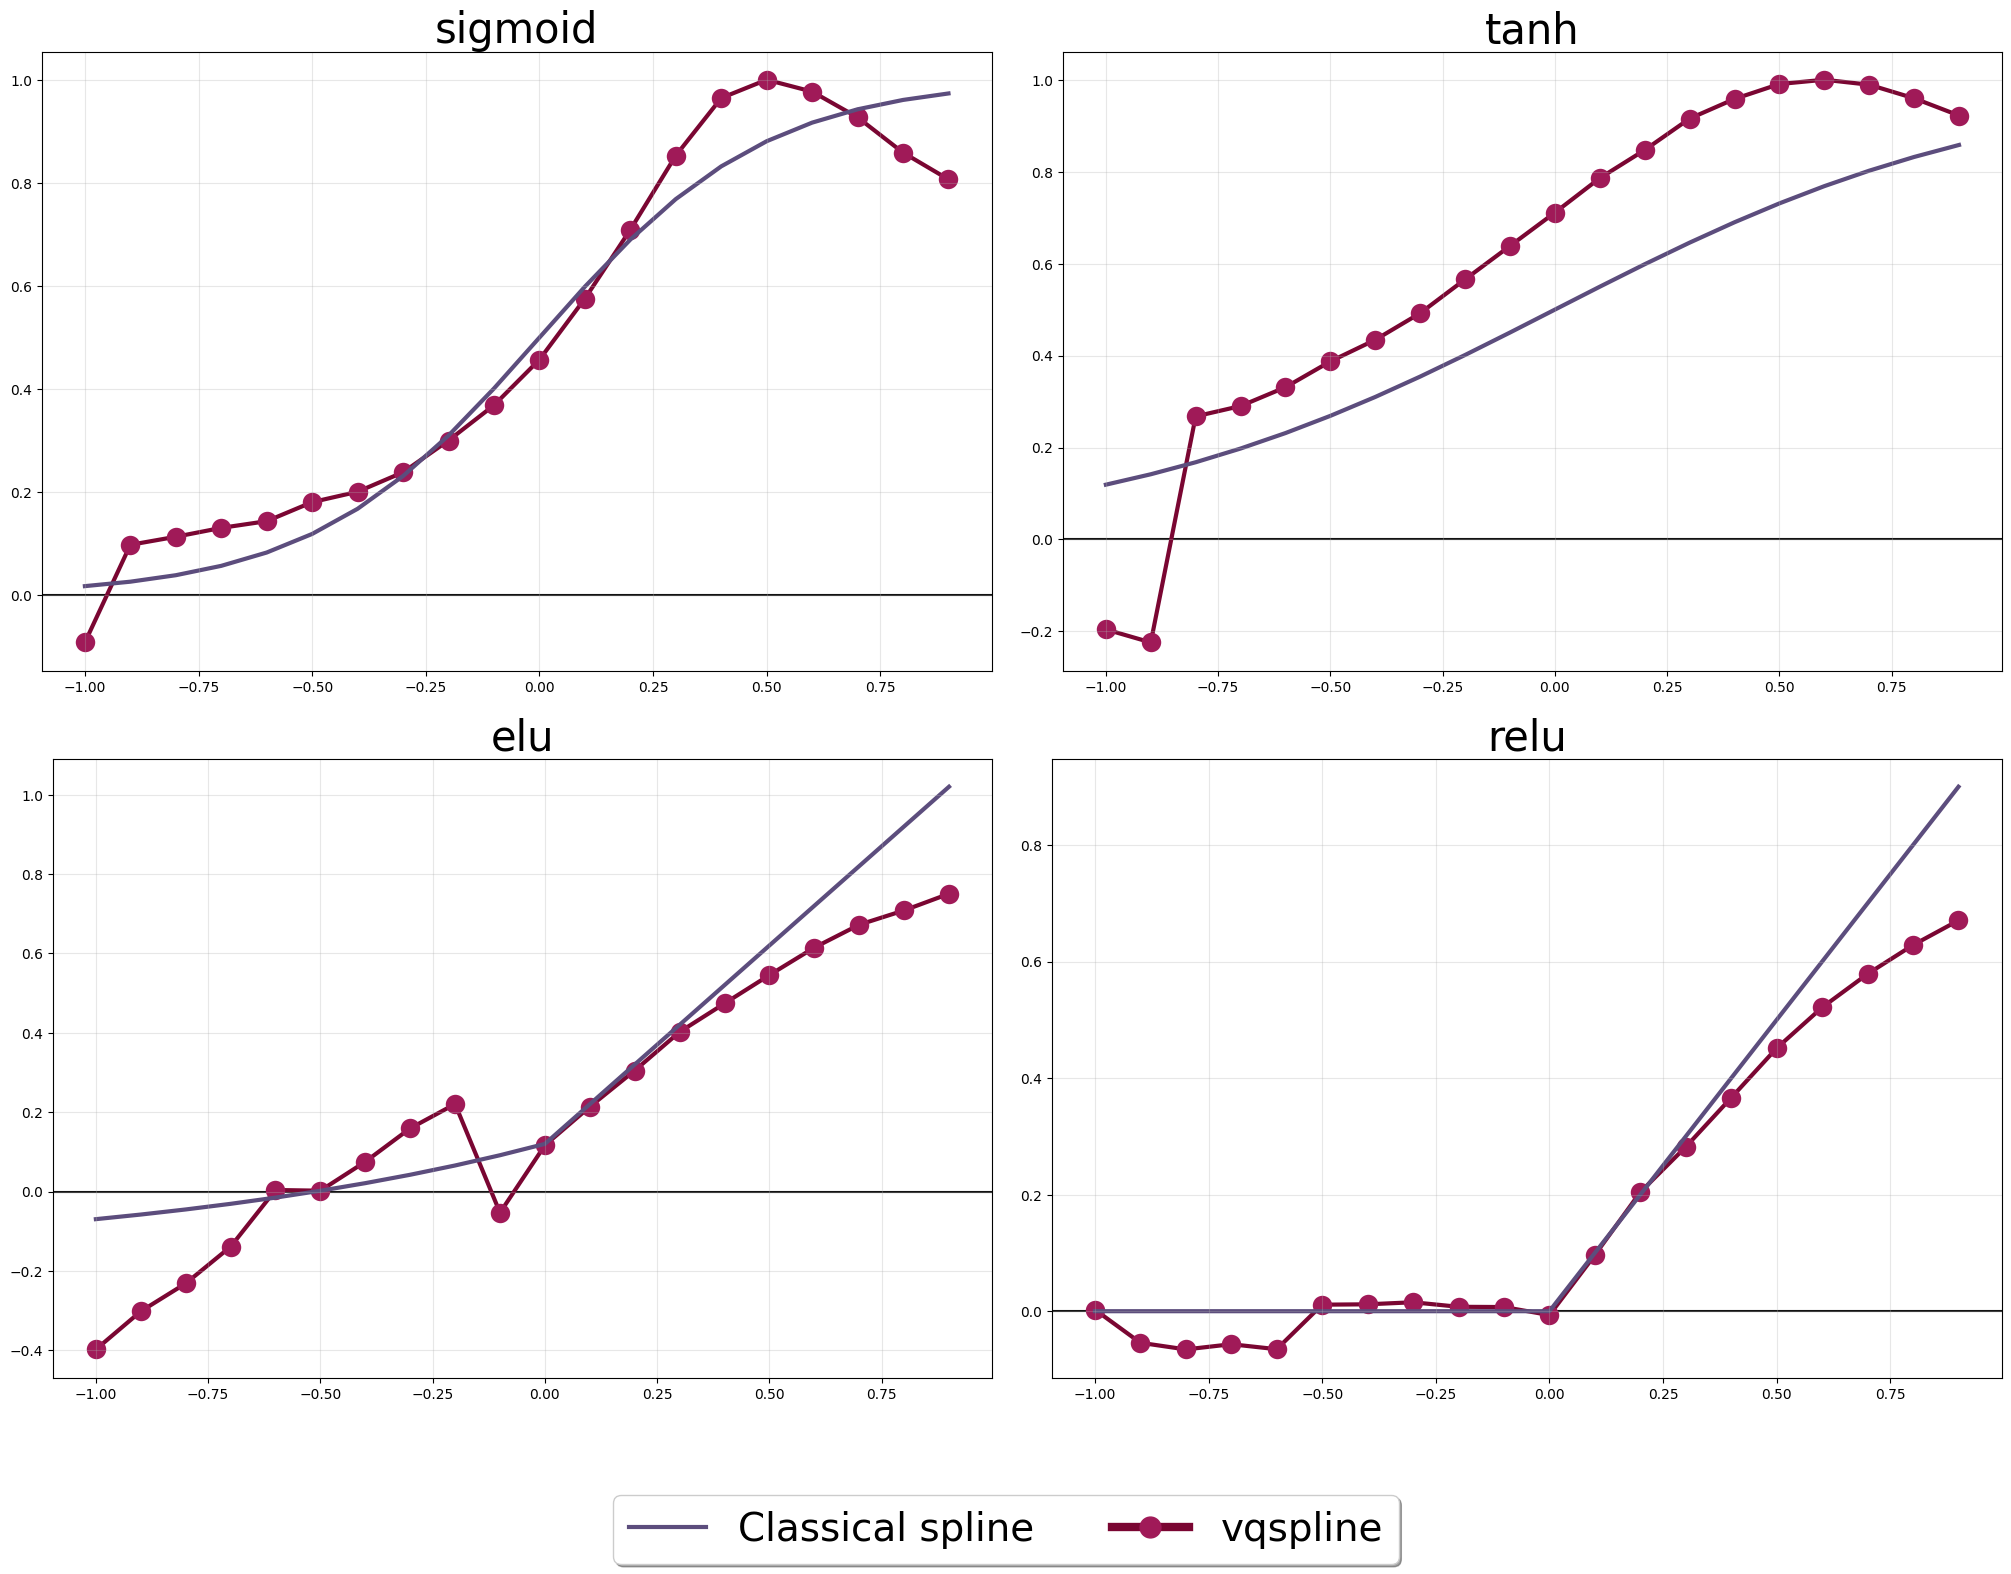

In [36]:

fig = plt.figure(constrained_layout=True, figsize=(20,14))
axE = fig.subfigures(2,2,  )
j = 0
k = 0
rss=[]
func_out = {'sigmoid': sigmoid,'tanh': tanh,'elu': elu, 'relu': relu}#, 'sin':sin_m}
func_list = list(func_out.keys())
fig.subplots_adjust(hspace=0.5)

for flab, fun in func_out.items():
    #axE[k][j].suptitle(f'{flab}',fontsize=30)

    ax = axE[k][j].subplots(nrows=1, ncols=1, sharey=True,)
    #ax.set_ylim(-0.1,1)
    j-=-1
    if j>=2:
        k-=-1
        j=j%2
    dl = df[df['function'] == flab].iloc[0]
    X = []
    f_i = func_dict[flab]

    x = np.arange(-1, 1 + .03, step).tolist()
    y = [fun(value,f_i) for value in x]

    for i in range(1, len(x)):
        X.append(np.arange(x[i - 1], x[i], step - 0.000001).tolist())


    qc_full = []
    classic_prod = []
    qprod = qProduct(1)
    for i in range(len(X)):
        for x in X[i]:
            point = [1,x]
            qc_full.append(qprod.direct_prod2(dl.weights[i],point,visualize=False))  

    x = [item for sublist in X for item in sublist]
    y = [fun(value,f_i) for value in x]




    x1=[i for j,i in enumerate(x) if j%2==0]
    y1=[i for j,i in enumerate(y) if j%2==0]
    qc_full1 = [i  for j,i in enumerate(qc_full) if j%2==0]

    x2 = np.array([i for i in x]).reshape([20,2])
    yeee = np.array([i.item() for i in qc_full]).reshape([20,2])

    ax.axhline(0, color="#111111", zorder = -5)

    #ax.plot(x, qc_full, color='steelblue',label=' Qspline') 
    #ax.scatter(x, qc_full, color='steelblue',label=' Qspline') 

    #for xk, yk in zip(x2, yeee):
    #    ax.plot(xk, yk, zorder = 1,color='#33cc33') 
    #    ax.scatter(xk, yk, zorder=2,color='#008000') 
    colorl = '#7a0632'
    colors = '#a01a58'

    ax.plot(x1,qc_full1,color=colorl, zorder = -1,lw=3)
    ax.scatter(x1,qc_full1,color=colors, zorder = -1, linewidths=8)

    ax.plot(x1,y1, zorder = -1, color = '#5c4d7d',linewidth=3, label= 'Classical spline')
    ax.grid(alpha=0.3)
    handles, labels = ax.get_legend_handles_labels()
    handles.append(mlines.Line2D([], [], color=colorl, marker='.',linewidth=6,
                          markersize=30, label='vqspline', markerfacecolor=colors, markeredgecolor=colors))
    ax.set_title(f'{flab}',fontsize=30)

    #plt.legend(handles = handles, loc='best', fontsize=24)
lgd = fig.legend(handles = handles, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5, fontsize = 28)
fig.savefig(f'plots/n_vqsplot.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()
plt.close()


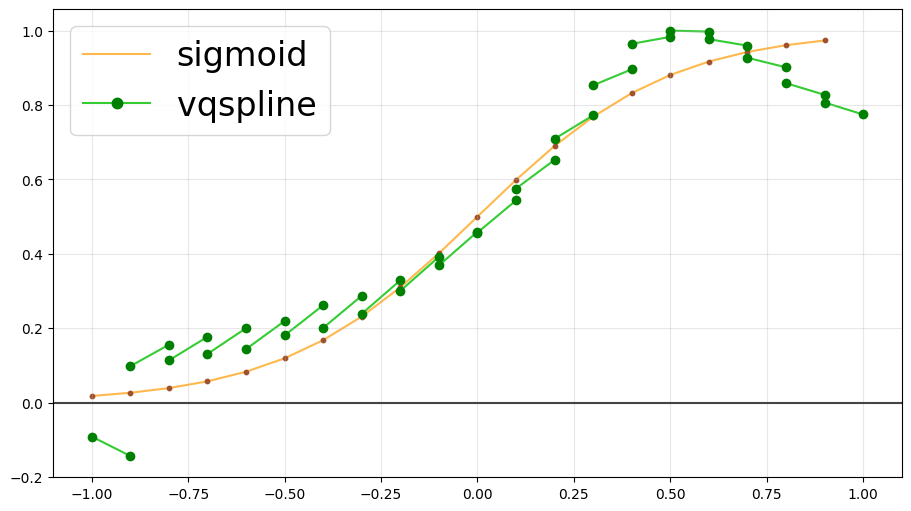

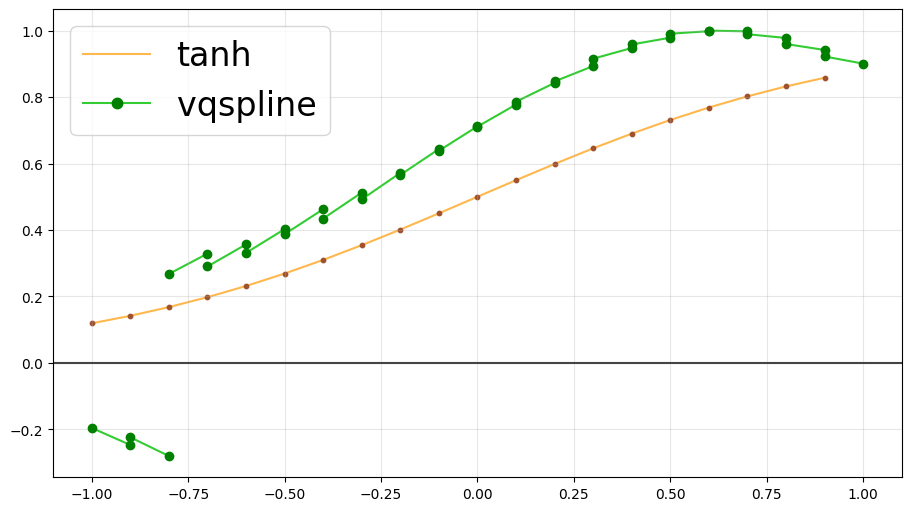

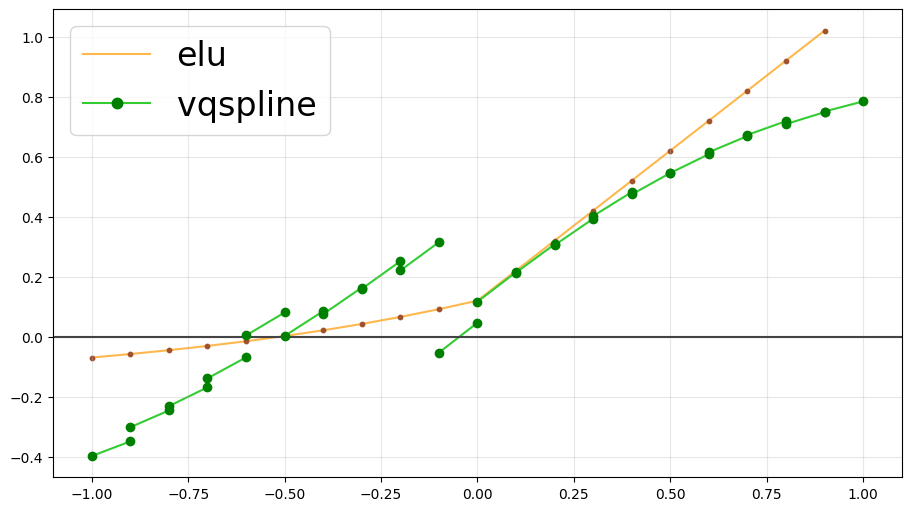

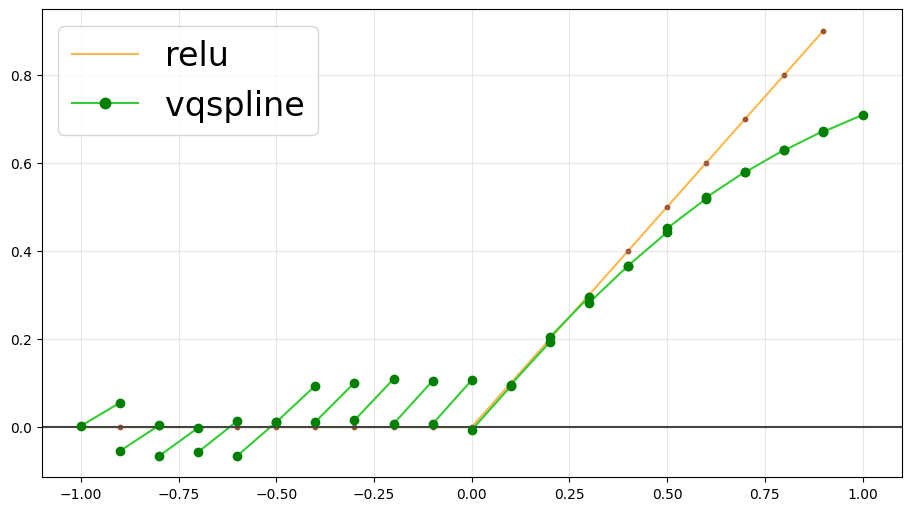

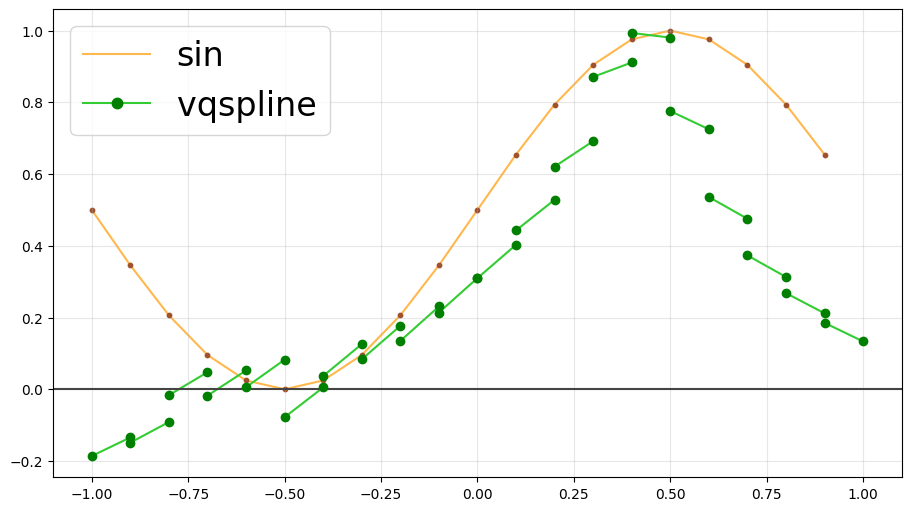

In [ ]:

j = 0
k = 0
rss=[]
for flab, fun in func_out.items():
    #axE[k][j].suptitle(f'{flab}',fontsize=30)
    fig = plt.figure(constrained_layout=True, figsize=(9,5))
    axE = fig.subfigures(1,1,  )

    ax = axE.subplots(nrows=1, ncols=1, sharey=True,)
    #ax.set_ylim(-0.1,1)
    j-=-1
    if j>=2:
        k-=-1
        j=j%2
    dl = df[df['function'] == flab].iloc[0]
    X = []
    f_i = func_dict[flab]

    x = np.arange(-1, 1 + .03, step).tolist()
    y = [fun(value,f_i) for value in x]

    for i in range(1, len(x)):
        X.append(np.arange(x[i - 1], x[i], step - 0.000001).tolist())


    qc_full = []
    classic_prod = []
    qprod = qProduct(1)
    for i in range(len(X)):
        for x in X[i]:
            point = [1,x]
            qc_full.append(qprod.direct_prod2(dl.weights[i],point,visualize=False))  

    x = [item for sublist in X for item in sublist]
    y = [fun(value,f_i) for value in x]




    x1=[i for j,i in enumerate(x) if j%2==0]
    y1=[i for j,i in enumerate(y) if j%2==0]
    x2 = np.array([i for i in x]).reshape([20,2])
    yeee = np.array([i.item() for i in qc_full]).reshape([20,2])

    ax.axhline(0, color="#444444")

    #ax.plot(x, qc_full, color='steelblue',label=' Qspline') 
    #ax.scatter(x, qc_full, color='steelblue',label=' Qspline') 
    for xk, yk in zip(x2, yeee):
        ax.plot(xk, yk, zorder = 1,color='#33cc33') 
        ax.scatter(xk, yk, zorder=2,color='#008000') 

    ax.plot(x1,y1,color='#ffb84d', zorder = -1, label=f'{flab}')
    ax.scatter(x1,y1,color='sienna',zorder=0,s=10)
    ax.grid(alpha=0.3)
    handles, labels = ax.get_legend_handles_labels()
    handles.append(mlines.Line2D([], [], color='#33cc33', marker='.',
                          markersize=15, label='vqspline', markerfacecolor='#008000', markeredgecolor='#008000'))
    plt.legend(handles = handles, loc='best', fontsize=24)

    plt.savefig(f'plots/n_vqs_{flab}_plot')
    plt.show()
plt.close()
